In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [2]:
df = pd.read_csv(r'C:\Users\Sooraj\Downloads\Company_Data.csv')

In [3]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [4]:
label_encoder = preprocessing.LabelEncoder()
df['ShelveLoc'] = label_encoder.fit_transform(df['ShelveLoc'])
df['Urban'] = label_encoder.fit_transform(df['Urban'])
df['US'] = label_encoder.fit_transform(df['US'])

In [5]:
df['Sales'] = np.where(df['Sales'] >= 8, 'High', 'low')

In [6]:
X=df.drop('Sales', axis=1)
y=df['Sales']

In [7]:
X

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,0,42,17,1,1
1,111,48,16,260,83,1,65,10,1,1
2,113,35,10,269,80,2,59,12,1,1
3,117,100,4,466,97,2,55,14,1,1
4,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,1,1
396,139,23,3,37,120,2,55,11,0,1
397,162,26,12,368,159,2,40,18,1,1
398,100,79,7,284,95,0,50,12,1,1


In [8]:
y

0      High
1      High
2      High
3       low
4       low
       ... 
395    High
396     low
397     low
398     low
399    High
Name: Sales, Length: 400, dtype: object

In [9]:
# Splitting data into training and testing data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Building Decision Tree Classifier using Entropy Criteria

In [10]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

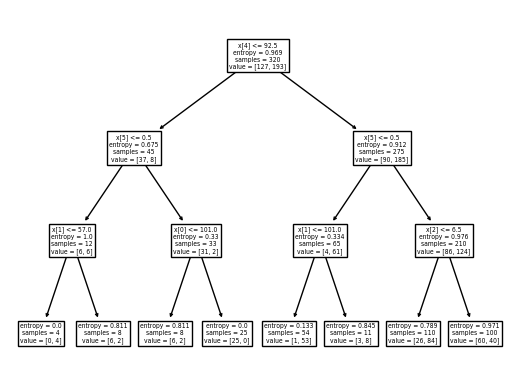

In [11]:
#PLot the decision tree
tree.plot_tree(model);


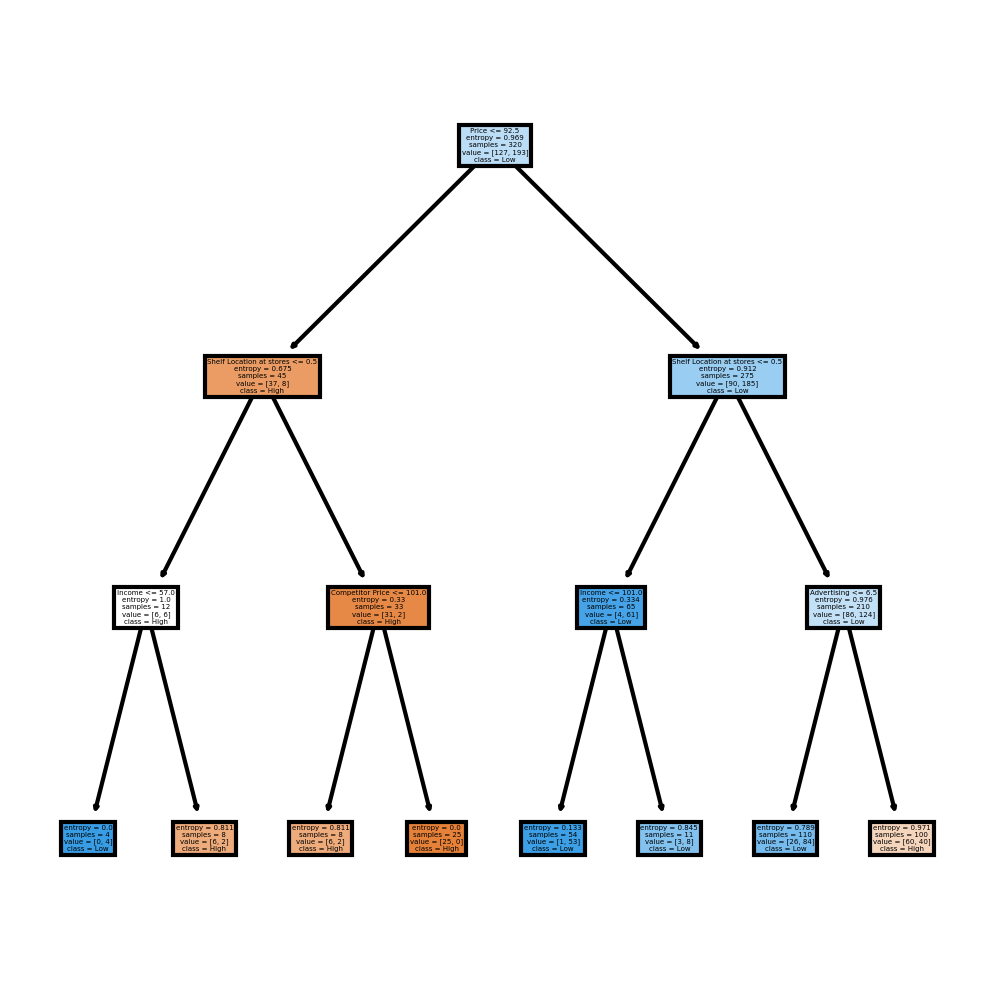

In [12]:
fn=['Competitor Price','Income','Advertising','Population','Price','Shelf Location at stores','Age','Education','Urban','US']
cn=['High', 'Low']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [13]:
#Predicting on test data
preds = model.predict(X_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category 

low     41
High    39
dtype: int64

In [14]:
preds

array(['low', 'low', 'High', 'low', 'low', 'low', 'High', 'High', 'High',
       'low', 'low', 'High', 'High', 'low', 'High', 'High', 'low', 'High',
       'low', 'High', 'High', 'low', 'low', 'low', 'low', 'low', 'High',
       'low', 'High', 'low', 'High', 'High', 'low', 'low', 'High', 'low',
       'low', 'High', 'low', 'low', 'low', 'low', 'High', 'High', 'low',
       'High', 'low', 'High', 'low', 'low', 'High', 'low', 'low', 'High',
       'High', 'low', 'High', 'High', 'High', 'low', 'low', 'low', 'High',
       'low', 'low', 'High', 'High', 'low', 'low', 'High', 'High', 'High',
       'High', 'low', 'High', 'low', 'High', 'High', 'High', 'High'],
      dtype=object)

In [15]:
pd.crosstab(y_test,preds) # getting the 2 way table to understand the correct and wrong predictions

col_0,High,low
Sales,,
High,28,9
low,11,32


In [16]:
# Accuracy 
np.mean(preds==y_test)

0.75

In [17]:
y_pred_entropy = model.predict(X_test)

In [18]:
classification_rep_entropy = classification_report(y_test, y_pred_entropy)

In [19]:
print(classification_rep_entropy)

              precision    recall  f1-score   support

        High       0.72      0.76      0.74        37
         low       0.78      0.74      0.76        43

    accuracy                           0.75        80
   macro avg       0.75      0.75      0.75        80
weighted avg       0.75      0.75      0.75        80



### Building Decision Tree Classifier (CART) using Gini Criteria

In [20]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [21]:
model_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

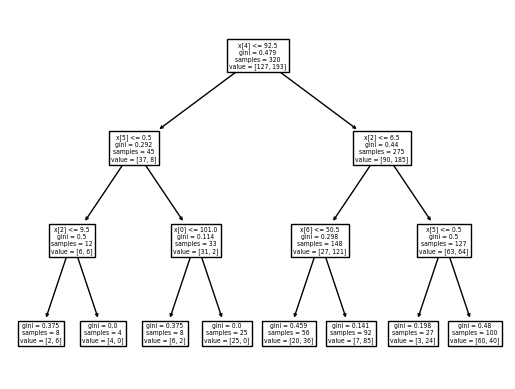

In [22]:
#PLot the decision tree
tree.plot_tree(model_gini);


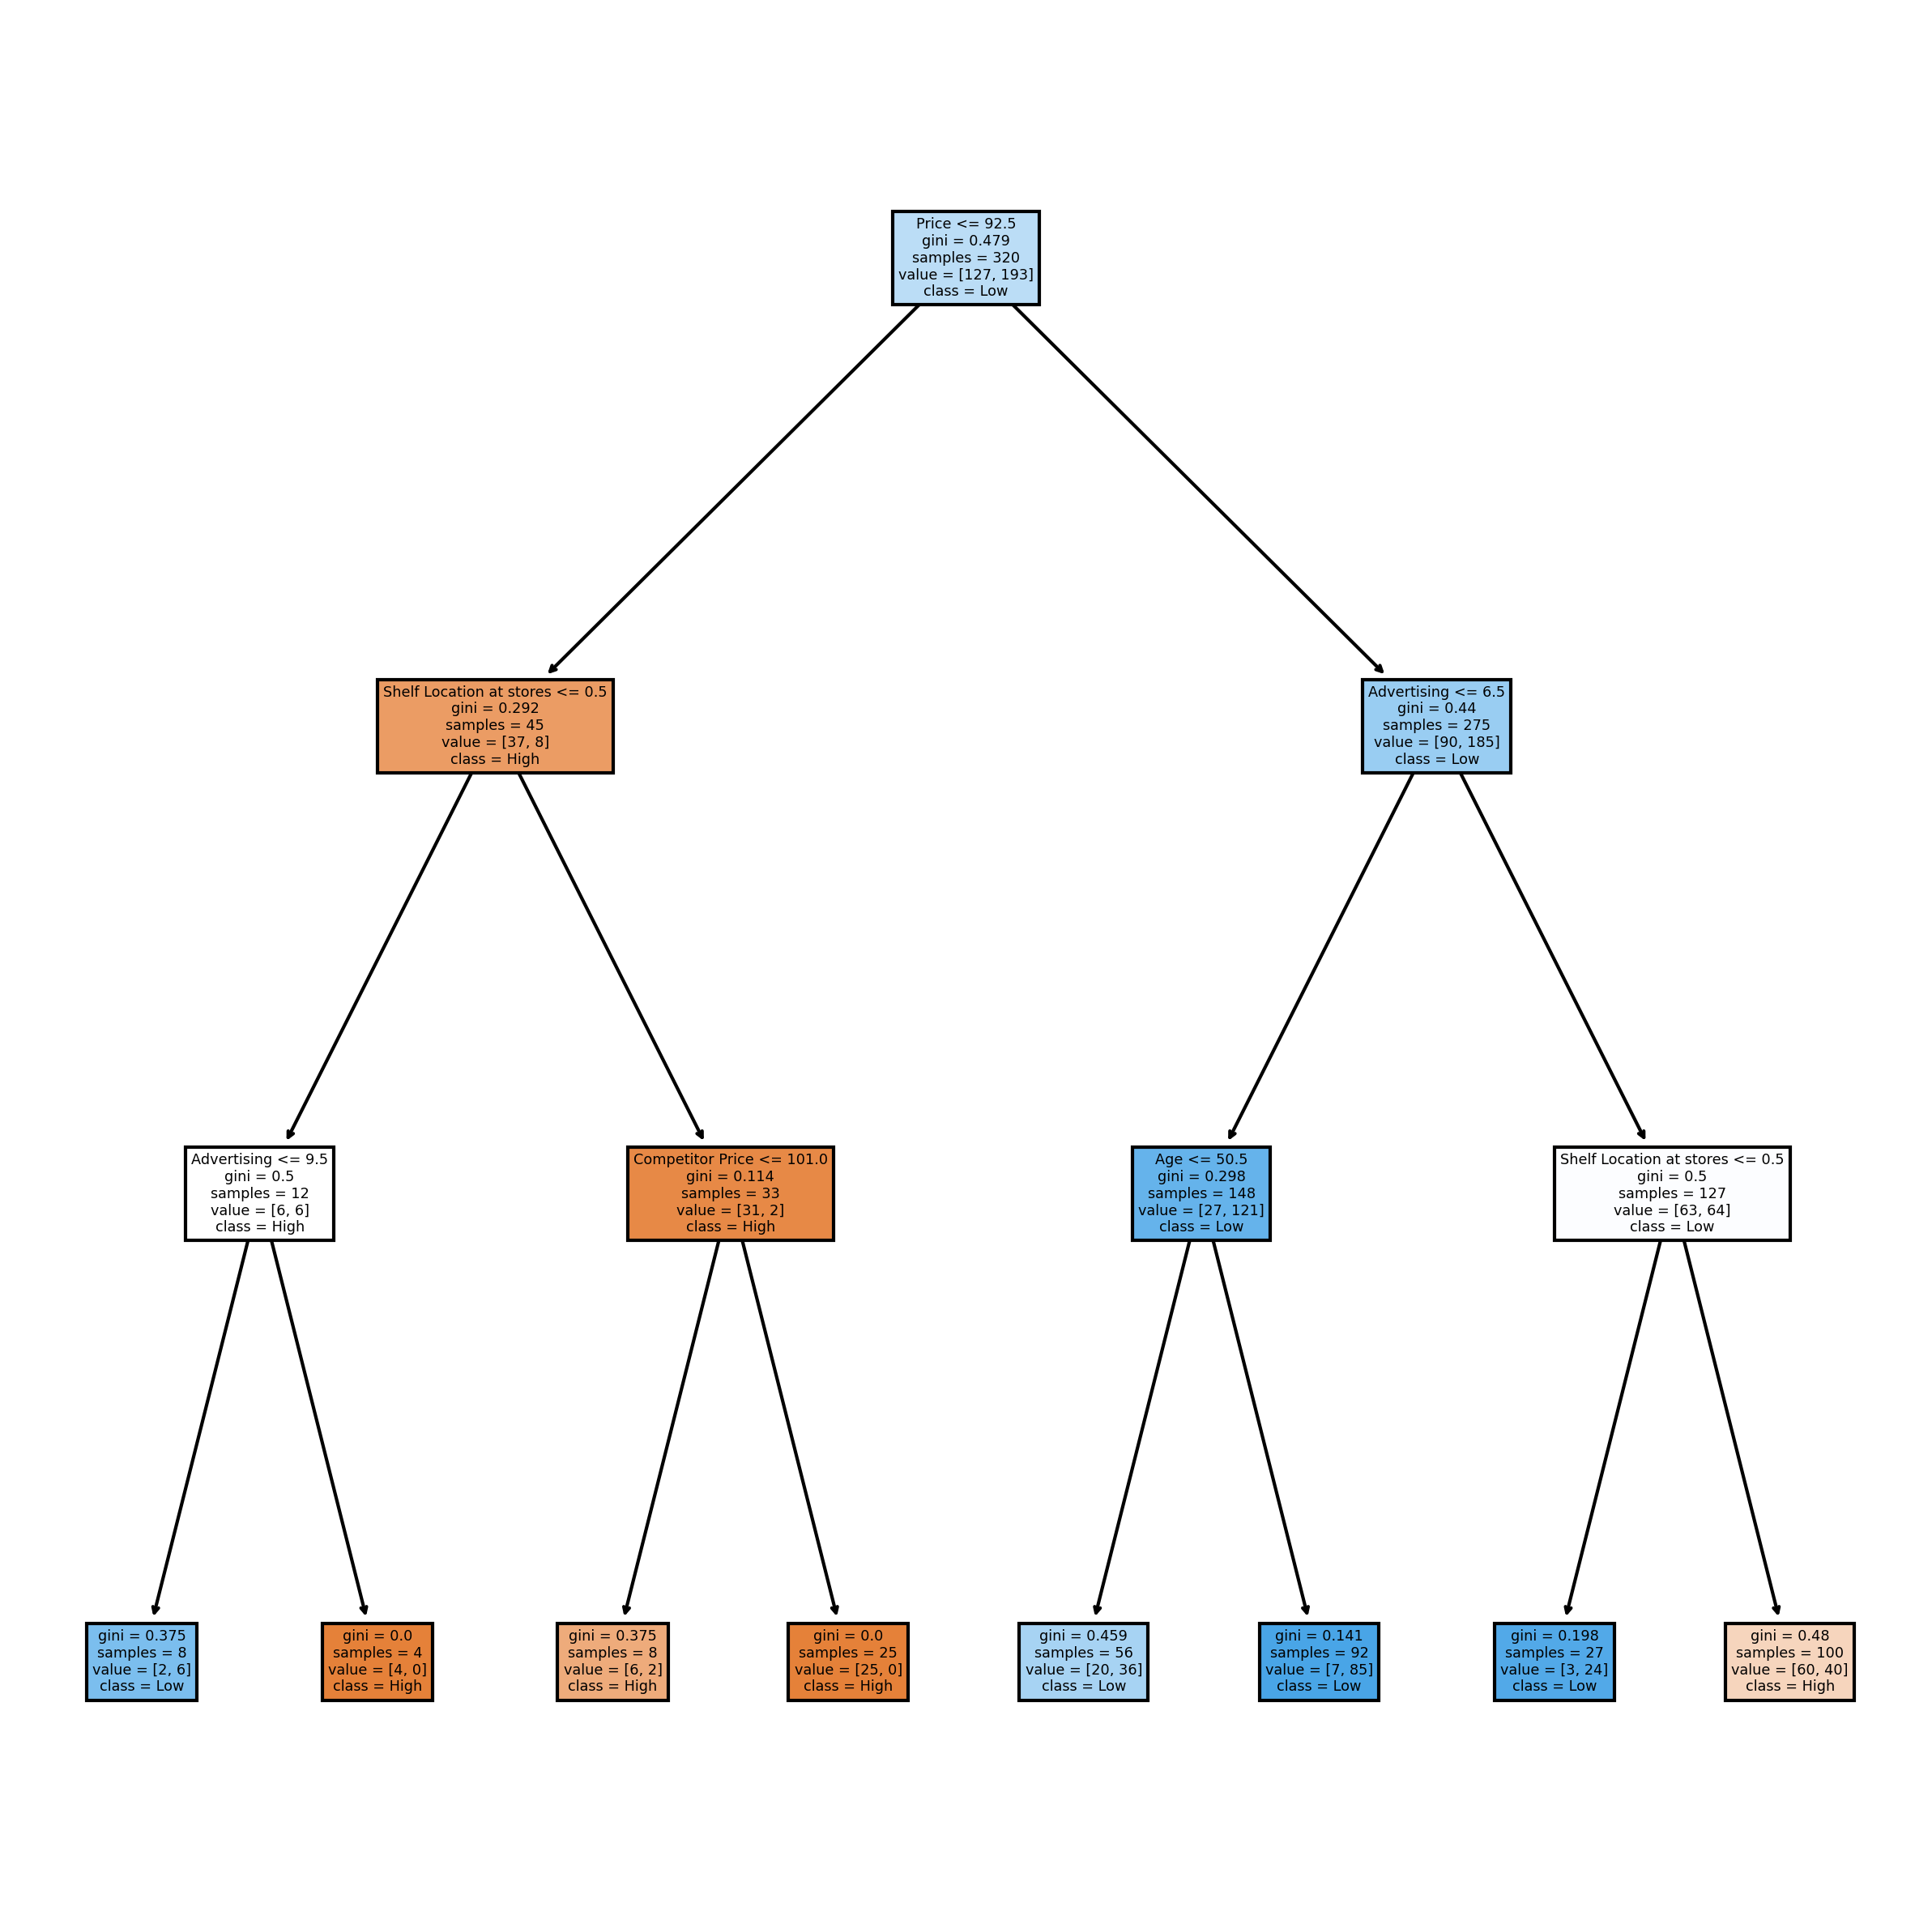

In [23]:
fn=['Competitor Price','Income','Advertising','Population','Price','Shelf Location at stores','Age','Education','Urban','US']
cn=['High', 'Low']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,10), dpi=300)
tree.plot_tree(model_gini,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [24]:
#Prediction and computing the accuracy
pred=model_gini.predict(X_test)
np.mean(preds==y_test)

0.75

In [25]:
y_pred_gini = model_gini.predict(X_test)

In [26]:
classification_rep_gini = classification_report(y_test, y_pred_gini)

In [27]:
print(classification_rep_gini)

              precision    recall  f1-score   support

        High       0.69      0.73      0.71        37
         low       0.76      0.72      0.74        43

    accuracy                           0.73        80
   macro avg       0.72      0.73      0.72        80
weighted avg       0.73      0.72      0.73        80



## Alternate way to visualize

In [28]:
from sklearn.tree import plot_tree

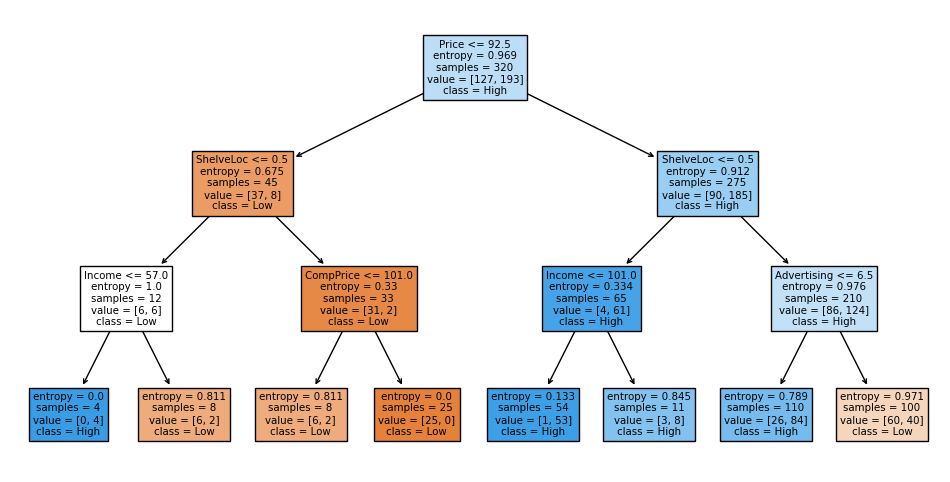

In [29]:
plt.figure(figsize=(12, 6))
plot_tree(model, filled=True, feature_names=X.columns, class_names=['Low', 'High'])
plt.show()

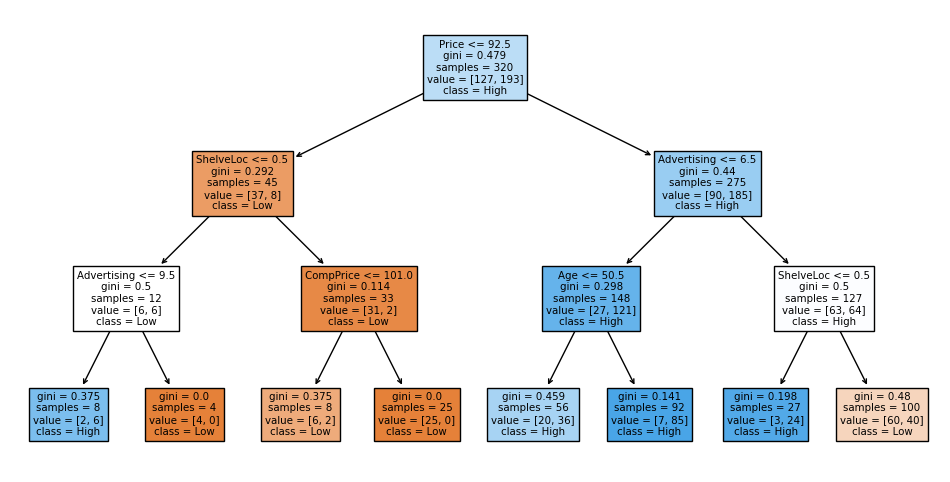

In [30]:
plt.figure(figsize=(12, 6))
plot_tree(model_gini, filled=True, feature_names=X.columns, class_names=['Low', 'High'])
plt.show()